# Multiple Non-Linear Regression Model

The dataset used for this project, `concrete.csv`, is downloaded from [GitHub](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/concrete.csv).

## Objectives

1. **Import Necessary Libraries:**
   - Load essential Python libraries required for data manipulation, visualization, and model building.

2. **Read and View Dataset:**
   - Read the dataset from a CSV file and display its contents to understand the structure and features.

3. **Check for Missing Values:**
   - Identify and handle any missing values in the dataset to ensure data quality and completeness.

4. **Exploratory Data Analysis (EDA):**
   - Visualize the dataset to uncover patterns, trends, and relationships among the features.
   - Calculate **Pearson correlation coefficients** to identify linear relationships between variables.

5. **Train Linear and Polynomial Regression Models:**
   - Use the scikit-learn library to train both linear and non-linear (polynomial) regression models.
   - Evaluate the models using **Model Performance Metrics** such as Mean Squared Error (MSE) and $R^2$ on training, cross-validation, and testing data.

6. **Select the Optimum Model:**
   - Analyze the performance metrics to determine the most suitable model for the dataset, which, in this case, is a polynomial regression model of degree **3**.

7. **Build and Train Custom Polynomial Model:**
   - Develop a custom polynomial regression model of degree **3**.
   - Train the custom model using gradient descent and evaluate its performance.

8. **Compare Custom Model with Scikit-Learn Model:**
   - Compare the performance of the custom model with the scikit-learn model to validate its effectiveness.
   - Highlight the strengths of the custom model and its ability to capture complex patterns within the data.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Read the dataset from the CSV file and save it into a variable
data = pd.read_csv("concrete.csv")
data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


### Attributes information from `Kaggle` by `VISHVANATH METKARI`:
- **Cement** (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
- **Blast Furnace Slag** (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
- **Fly Ash** (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
- **Water** (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
- **Superplasticizer** (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
- **Coarse Aggregate** (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
- **Fine Aggregate** (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
- **Age** -- quantitative -- Day (1~365) -- Input Variable
- **Concrete compressive strength** -- quantitative -- MPa(megapascals) -- Output Variable

In [3]:
# Check for any missing values in a dataset
data.isna().any()

cement          False
slag            False
ash             False
water           False
superplastic    False
coarseagg       False
fineagg         False
age             False
strength        False
dtype: bool

Just as we did with the multiple linear regression project, we will approach this dataset as if it is unknown. We will employ techniques such as **Exploratory Data Analysis (EDA)** to visualize the dataset, calculating **Pearson correlation coefficients** to identify linear relationships, and evaluating **Model Performance Metrics** to better understand which model to choose for this particular dataset.

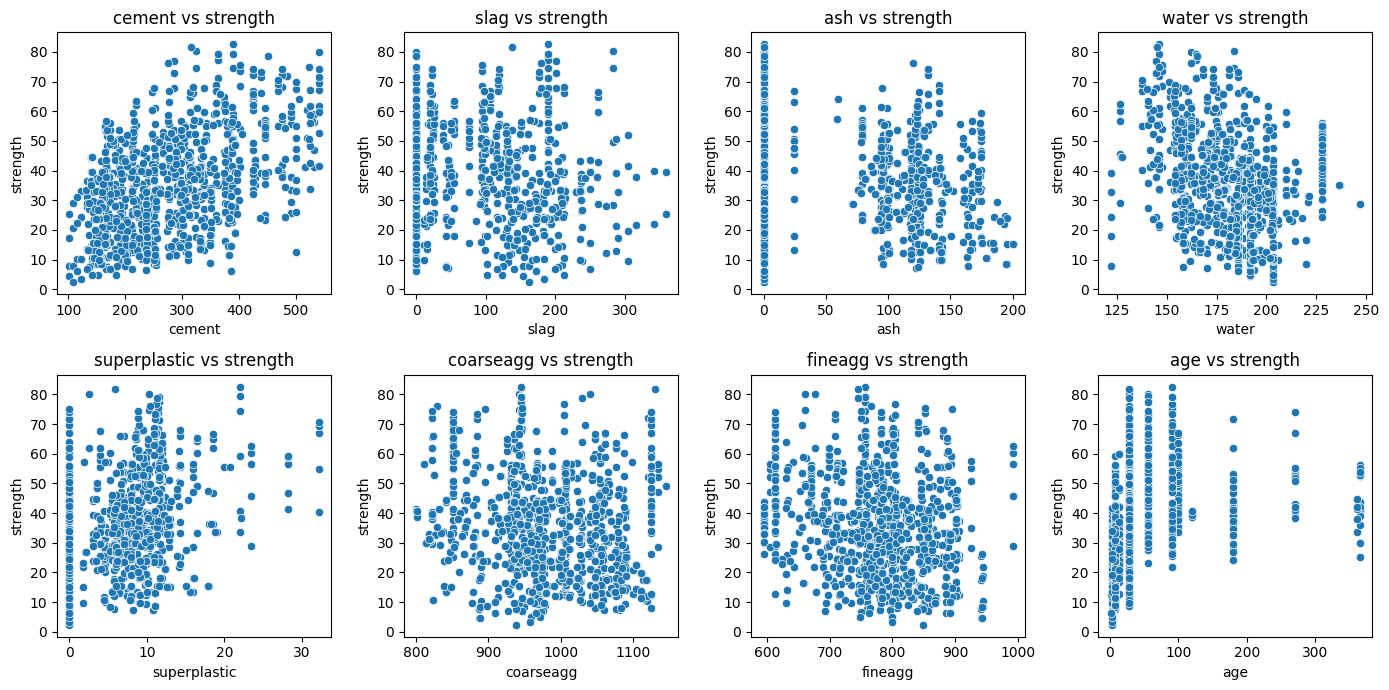

In [4]:
# Create a figure with a 2x4 grid of subplots
_, axes = plt.subplots(2, 4, figsize=(14, 7))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each feature and create a scatter plot
for i, feature in enumerate(data.columns[:-1]):
    sns.scatterplot(data=data, x=feature, y=data.columns[-1], ax=axes[i])
    axes[i].set_title(f"{feature} vs {data.columns[-1]}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(data.columns[-1])

# Adjust layout to prevent overlap
plt.tight_layout()

By examining the above plots of each feature variable against the target variable, it appears that the first plot of **cement vs. strength** suggests a weak positive correlation, while the other plots do not seem to exhibit any noticeable linear correlation. To gain a more quantitative understanding of the relationships between the features and the target variable, we will calculate the **Pearson correlation coefficients** next.

In [5]:
# Calculate Pearson correlation coefficients matrix
correlation_matrix = data.corr()

# Extract correlation coefficients of features with the target variable
target_correlations = correlation_matrix[data.columns[-1]][:-1]

# Reset the index to convert Series to DataFrame for seaborn bar plot
correlation_df = target_correlations.reset_index()
correlation_df.columns = ["Feature", "Correlation"]

correlation_df

,Feature,Correlation
0,cement,0.497832
1,slag,0.134829
2,ash,-0.105755
3,water,-0.289633
4,superplastic,0.366079
5,coarseagg,-0.164935
6,fineagg,-0.167241
7,age,0.328873


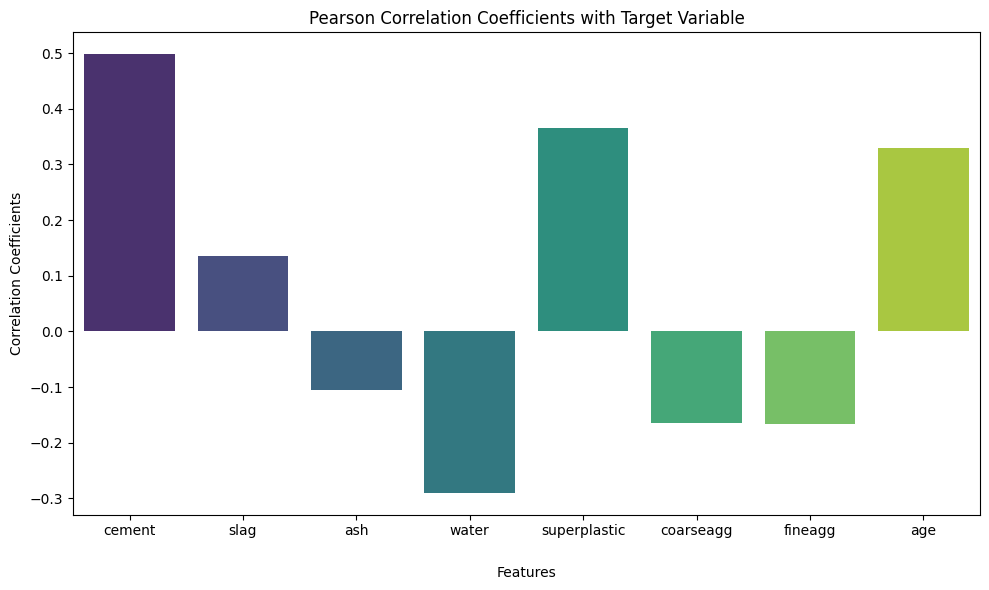

In [6]:
# Create a seaborn bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=correlation_df, x="Feature", y="Correlation", hue="Feature", palette="viridis")
plt.title("Pearson Correlation Coefficients with Target Variable")
plt.xlabel("Features", labelpad=20)
plt.ylabel("Correlation Coefficients")
plt.tight_layout()

The **Pearson correlation coefficients** reveal varying degrees of linear relationships between the features and the target variable (strength). **Cement** shows a moderate positive correlation `(0.498)`, indicating that as cement increases, strength also tends to increase. **Superplastic** `(0.366)` and **Age** `(0.329)` also exhibit positive correlations with strength but weak. Conversely, **Water** has a weak negative correlation `(-0.290)`, suggesting that higher water content reduces strength. **Ash** `(-0.106)`, **Coarse aggregate** `(-0.165)`, and **Fine aggregate** `(-0.167)` show very weak negative correlations, indicating slight decreases in strength with higher quantities of these materials. **Slag** has a very weak positive correlation `(0.135)`. While these coefficients help identify which features are more influential on the target variable (strength), to determine the most suitable model among different options, we will employ the last technique of evaluating **Model Performance Metrics**.

This time, we'll begin by training linear regression and non-linear/polynomial regression models using scikit-learn. Afterwards, we'll compare the results of the optimal model found with scikit-learn to our custom-made model, which is based on the resulting model from scikit-learn.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Extract feature variables (X) and target variable (y) from the DataFrame
X = np.array(data[data.columns[:-1]])
y = np.array(data[data.columns[-1]])

# Split the dataset into training, cross-validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_cv_scaled = scaler.transform(X_cv)
X_test_scaled = scaler.transform(X_test)

# Train the linear regression model and evaluate performance
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

# Evaluate on training data
y_pred_linear_train = linear_reg.predict(X_train_scaled)
mse_linear_train = mean_squared_error(y_train, y_pred_linear_train)
r2_linear_train = r2_score(y_train, y_pred_linear_train)

# Evaluate on cross-validation data
y_pred_linear_cv = linear_reg.predict(X_cv_scaled)
mse_linear_cv = mean_squared_error(y_cv, y_pred_linear_cv)
r2_linear_cv = r2_score(y_cv, y_pred_linear_cv)


print("Linear Regression:")
print("Training Mean Squared Error:", mse_linear_train)
print("Training R^2 Score:", r2_linear_train)
print("Cross-Validation Mean Squared Error:", mse_linear_cv)
print("Cross-Validation R^2 Score:", r2_linear_cv)
print()

# Train non-linear/polynomial regression models and evaluate each model
degrees = [2, 3, 4, 5]
polynomial_models = {}

for degree in degrees:
    polynomial_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    polynomial_reg.fit(X_train_scaled, y_train)
    
    # Evaluate on training data
    y_pred_poly_train = polynomial_reg.predict(X_train_scaled)
    mse_poly_train = mean_squared_error(y_train, y_pred_poly_train)
    r2_poly_train = r2_score(y_train, y_pred_poly_train)
    
    # Evaluate on cross-validation data
    y_pred_poly_cv = polynomial_reg.predict(X_cv_scaled)
    mse_poly_cv = mean_squared_error(y_cv, y_pred_poly_cv)
    r2_poly_cv = r2_score(y_cv, y_pred_poly_cv)
    
    # Save the model
    polynomial_models[degree] = polynomial_reg

    
    print(f"Polynomial Regression (Degree {degree}):")
    print("Training Mean Squared Error:", mse_poly_train)
    print("Training R^2 Score:", r2_poly_train)
    print("Cross-Validation Mean Squared Error:", mse_poly_cv)
    print("Cross-Validation R^2 Score:", r2_poly_cv)
    print()

Linear Regression:
Training Mean Squared Error: 107.23993872814275
Training R^2 Score: 0.6196723710532999
Cross-Validation Mean Squared Error: 120.47566992354584
Cross-Validation R^2 Score: 0.5822578426365101

Polynomial Regression (Degree 2):
Training Mean Squared Error: 51.6116510889227
Training R^2 Score: 0.8169587085047163
Cross-Validation Mean Squared Error: 65.64019886896534
Cross-Validation R^2 Score: 0.7723965485919994

Polynomial Regression (Degree 3):
Training Mean Squared Error: 19.217147446158332
Training R^2 Score: 0.9318461740094365
Cross-Validation Mean Squared Error: 29.742612289280178
Cross-Validation R^2 Score: 0.896869276334097

Polynomial Regression (Degree 4):
Training Mean Squared Error: 4.314577790739136
Training R^2 Score: 0.9846983021389281
Cross-Validation Mean Squared Error: 111330.99318903545
Cross-Validation R^2 Score: -385.0335394334934

Polynomial Regression (Degree 5):
Training Mean Squared Error: 1.7599256109507808
Training R^2 Score: 0.9937584043531366

The evaluation of regression models reveals that linear regression provides a moderate fit with a training MSE of `107.24` and an $R^2$ of `0.62`, while cross-validation performance slightly drops. Polynomial regression models of degrees **2** and **3** significantly improve both training and cross-validation performance, indicating better fit and generalization. However, models of degrees **4** and **5** suffer from severe overfitting, with extremely low training MSEs but drastically high cross-validation errors, making them impractical despite their apparent training accuracy. Thus, polynomial models of degree **2** or **3** are optimal for balancing fit and generalization. Therefore, we will test these two models on the testing data to determine the optimal one.

In [8]:
# Evaluate polynomial models of degree 2 and 3 on testing data
for degree in [2, 3]:
    polynomial_model = polynomial_models.get(degree)
    y_pred_poly_test = polynomial_model.predict(X_test_scaled)
    mse_poly_test = mean_squared_error(y_test, y_pred_poly_test)
    r2_poly_test = r2_score(y_test, y_pred_poly_test)

    print(f"Polynomial Regression (Degree {degree}):")
    print("Test Mean Squared Error:", mse_poly_test)
    print("Test R^2 Score:", r2_poly_test)
    print()

Polynomial Regression (Degree 2):
Test Mean Squared Error: 54.466158557339185
Test R^2 Score: 0.7823789601157898

Polynomial Regression (Degree 3):
Test Mean Squared Error: 44.456918785137475
Test R^2 Score: 0.8223711538994547



Based on testing data evaluation, both degree **2** and degree **3** polynomial regression models perform well. However, the degree **3** model demonstrates slightly better predictive accuracy, with a lower Mean Squared Error of `44.46` and a higher $R^2$ score of `0.82`. Therefore, the degree **3** polynomial regression model is deemed optimal for our dataset. Now, we will build our custom polynomial regression model of degree **3** and compare the results with the scikit-learn optimum model.

We can represent our polynomial regression model of degree **3** with the following vectorized equation:

$$
\begin{equation}
\hat{\mathbf{y}} = f(\mathbf{X}) = \mathbf{X} \cdot \mathbf{w} + b
\end{equation}
$$

where:
- $\hat{\mathbf{y}}$ represents the vector of predicted variables (dependent variables) for all training examples,
- $\mathbf{X}$ represents the matrix of input features (independent variables),
- $\mathbf{w}$ represents the vector of weights (coefficients),
- $b$ represents the $y$-intercept (bias term).

Our goal is to find the optimal values of $\mathbf{w}$ and $b$ that minimize the Mean Squared Error (MSE) cost function. The MSE is defined as:

$$
\begin{equation}
\text{MSE} = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y_i})^2 \tag{2}
\end{equation}
$$

where:
- $m$ is the number of data points,
- $y_i$ is the actual target value for the $i$-th data point,
- $\hat{y_i}$ is the predicted value for the $i$-th data point.

To update our parameters, we will use the gradient descent optimization algorithm:

$$
\begin{equation}
w_{j, \text{new}} = w_{j, \text{old}} - \alpha \times \frac{\partial \text{MSE}}{\partial w_j} \tag{3}
\end{equation}
$$

$$
\begin{equation}
b_{\text{new}} = b_{\text{old}} - \alpha \times \frac{\partial \text{MSE}}{\partial b} \tag{4}
\end{equation}
$$

where:
- $j = 1, 2, 3, \ldots, n$
- $w_{j, \text{new}}$ and $w_{j, \text{old}}$ are the updated and current weights for the $j$-th feature, respectively,
- $b_{\text{new}}$ and $b_{\text{old}}$ are the updated and current $y$-intercepts, respectively,
- $\alpha$ is the learning rate,
- $\frac{\partial \text{MSE}}{\partial w_j}$ is the gradient of the Mean Squared Error (MSE) with respect to the $j$-th weight,
- $\frac{\partial \text{MSE}}{\partial b}$ is the gradient of the MSE with respect to the $y$-intercept.

and,

$$
\begin{equation}
\frac{\partial \text{MSE}}{\partial w_j} = \frac{2}{m} \sum_{i=1}^{m} (\hat{y_i} - y_i) \cdot (x^j_i) \tag{5}
\end{equation}
$$

$$
\begin{equation}
\frac{\partial \text{MSE}}{\partial b} = \frac{2}{m} \sum_{i=1}^{m} (\hat{y_i} - y_i) \tag{6}
\end{equation}
$$

In [9]:
from itertools import combinations_with_replacement


def polynomial_features_multiple(X: np.ndarray, degree: int):
    """
    Generate polynomial features for a given standardized dataset X up to a specific degree.
    
    Parameters:
    X (np.ndarray): The standardized input dataset of shape (n_samples, n_features).
    degree (int): The degree of the polynomial features.
    
    Returns:
    np.ndarray: A new dataset with polynomial features of shape (n_samples, n_output_features).
    
    """
    
    n_features = X.shape[1]
    
    # List to hold the polynomial features
    features = []
    
    # Add polynomial features of all degrees from 1 to the specified degree
    for d in range(1, degree + 1):
        for indices in combinations_with_replacement(range(n_features), d):
            new_feature = np.prod(X[:, indices], axis=1)
            features.append(new_feature)
    
    return np.vstack(features).T

In [16]:
def train_multiple_non_lr_model(X: np.ndarray, y: np.ndarray, degree: int, alpha=0.002, iterations=50000):
    """
    Train a multiple non-linear regression model using polynomial features.

    Parameters:
    X (numpy.ndarray): Standardize input features data of shape (n_samples, n_features)
    y (numpy.ndarray): Target data of shape (n_samples,)
    degree (int): The degree of the polynomial features.
    alpha (float): Learning rate for gradient descent.
    iterations (int): Number of iterations for gradient descent.

    Returns:
    X_poly (ndarray): A numpy array containing the polynomial features of the standardize input data.
    w (ndarray): Final weights after training.
    b (float): Final bias after training.
    learning_curve_data (ndarray): Data for learning curve (iterations vs cost).
    
    """

    # Generate polynomial features
    X_poly = polynomial_features_multiple(X, degree)
    
    # Initialize weights randomly
    w = np.random.rand(X_poly.shape[1])
    b = 0  # Initialize bias

    # List to store learning curve data
    learning_curve_data = []

    # Gradient descent loop
    for i in range(iterations):
        # Compute model predictions
        y_hat = np.dot(X_poly, w) + b

        # Compute Mean Squared Error (MSE) cost
        cost = np.sum((y - y_hat)**2) / len(y)

        # For every 5000 iterations print the iteration number, weights, bias, and cost and also record cost
        if ((i+1) % 5000) == 0:
            print(f"Iteration = {i+1}, w = {w}, b = {b}, cost = {cost}")
            learning_curve_data.append([i+1, cost])

        # Update weights and bias using gradient descent
        if (i+1) != iterations:
            for j in range(len(w)):
                # Update each weight
                w[j] = w[j] - alpha * (2 * (np.sum((y_hat - y) * X_poly[:, j])) / len(y))

            # Update bias
            b = b - alpha * (2 * (np.sum(y_hat - y)) / len(y))

    return X_poly, w, b, np.array(learning_curve_data)

In [17]:
# Train degree 3 polynomial model
X_poly_d3, w_d3, b_d3, lcd_d3 = train_multiple_non_lr_model(X_train_scaled, y_train, 3)

Iteration = 5000, w = [ 2.32821884e+00  2.21091682e+00  2.61224101e-01 -4.29543373e+00
  3.94626643e+00 -6.95996736e-01 -4.42391456e-01  7.03263775e+00
  1.33748333e+00 -1.71353921e+00 -1.65324495e+00 -1.59654824e+00
  6.43407666e-01 -2.07357037e-01  1.40910097e+00  1.20487260e+00
  5.45268932e+00 -2.01676542e+00 -1.33058488e+00  7.49713441e-01
  1.23529008e-01  4.76751878e-01  2.26090426e+00  1.08498633e+01
  9.83670537e-01  1.01664630e+00 -9.42449663e-01  1.17605941e+00
  3.62242210e-01  1.46363764e+00 -2.06198682e+00  4.01633402e-01
  2.02678512e-01 -7.70723439e-01 -1.78372314e+00  3.00438682e+00
  1.07432697e+00 -9.76796146e-01  3.37130061e+00  2.02272131e+00
  5.45148363e-01  3.79418864e-02  2.53366472e+00 -6.17051072e+00
  1.32310151e+00  1.92607154e+00 -8.98808897e-02  2.59509656e-02
 -5.92924586e-01  4.98035881e-01  1.40756666e+00  2.19523700e+00
  2.69887908e+00 -2.13999963e+00  1.10755996e+00  3.28792918e-01
 -8.63068740e-01 -7.51386625e-01  2.48914796e+00  3.17499748e+00
  6

Text(0, 0.5, 'Cost')

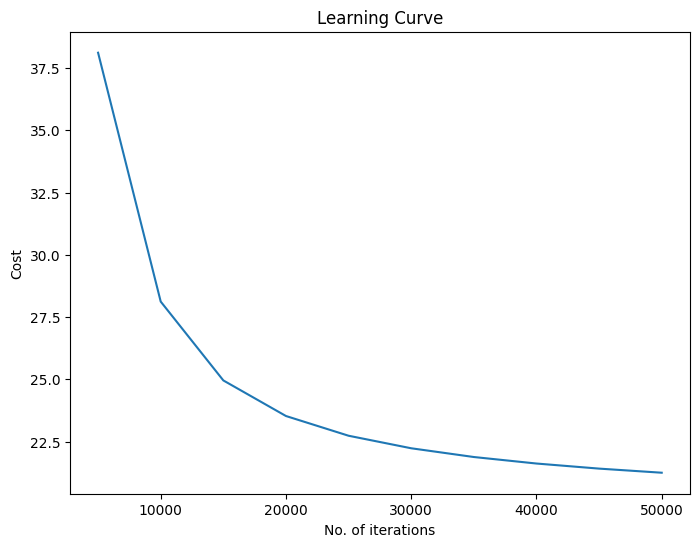

In [23]:
# Visualize the learning curve data
plt.figure(figsize=(8, 6))
sns.lineplot(x=lcd_d3[:, 0], y=lcd_d3[:, 1])
plt.title("Learning Curve")
plt.xlabel("No. of iterations")
plt.ylabel("Cost")

While our custom model reaches a minimum cost of `21.25` on the training data, which is very close to the scikit-learn model's cost of `19.22`, the number of iterations is very high at 50,000. The training data was standardized, and the learning rate ($\alpha$) is at its maximum. Therefore, we need to increase the number of iterations to get closer to the scikit-learn model's performance. The learning curve data confirms that gradient descent is properly minimizing the **Mean Squared Error** cost function, leading to optimal values for $\mathbf{w}$ and $b$. Next, we will evaluate our custom model on cross-validation and testing data and compare the results with the scikit-learn model.

In [24]:
# Calculate predictions on training, cross-validation, and testing data
y_pred_train = np.dot(X_poly_d3, w_d3) + b_d3
y_pred_cv = np.dot(polynomial_features_multiple(X_cv_scaled, 3), w_d3) + b_d3
y_pred_test = np.dot(polynomial_features_multiple(X_test_scaled, 3), w_d3) + b_d3

# Evaluate our model on the training data
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Evaluate our model on the cross-validation data
mse_cv = mean_squared_error(y_cv, y_pred_cv)
r2_cv = r2_score(y_cv, y_pred_cv)

# Evaluate our model on the testing data
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)


print("Our Model Polynomial Regression (Degree 3):")
print()
print("Training Mean Squared Error:", mse_train)
print("Training R^2 Score:", r2_train)
print()
print("Cross-Validation Mean Squared Error:", mse_cv)
print("Cross-Validation R^2 Score:", r2_cv)
print()
print("Test Mean Squared Error:", mse_test)
print("Test R^2 Score:", r2_test)

Our Model Polynomial Regression (Degree 3):

Training Mean Squared Error: 21.252873002743783
Training R^2 Score: 0.9246264508045857

Cross-Validation Mean Squared Error: 36.43141541024872
Cross-Validation R^2 Score: 0.8736762528156866

Test Mean Squared Error: 43.56896154274949
Test R^2 Score: 0.825919011570705


Our custom polynomial regression model of degree **3** demonstrated strong performance across training, cross-validation, and testing datasets, closely mirroring the results achieved by the scikit-learn polynomial regression model of the same degree. Despite requiring a higher number of iterations, our model achieved a training Mean Squared Error (MSE) of `21.25` and an $R^2$ score of `0.9246`, which is commendably close to the scikit-learn model's training MSE of `19.22` and $R^2$ score of `0.9318`. On cross-validation data, our model's MSE was `36.43` with an $R^2$ score of `0.8737`, compared to scikit-learn's MSE of `29.74` and $R^2$ score of `0.8969`. Finally, on the testing data, our model yielded an MSE of `43.57` and an $R^2$ score of `0.8259`, closely paralleling the scikit-learn model's MSE of `44.46` and $R^2$ score of `0.8224`.

These results validate the effectiveness of our gradient descent approach in minimizing the **Mean Squared Error** cost function, leading to optimal parameter values. The marginal differences in performance metrics between our model and the scikit-learn implementation affirm that our custom model is a robust alternative, providing valuable insights into the underlying data patterns. This project underscores the potential of custom machine learning implementations in achieving competitive performance with established libraries, offering flexibility and a deeper understanding of the model training process. This also underscores the effectiveness of the non-linear/polynomial regression approach in capturing complex patterns within the data. 